Alumno: **Ginés González Guirado**

# Homework 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**7.1** In exercise 6.2 (the Cornsweet example) we found that the vector of Fourier coefficients for the case of D=5 samples is (0,0,2,0,-1). Explore the effect of "padding" the Fourier spectrum by adding another 5 coefficients, all of which have zero value. That is, use the Fourier vector (0,0,2,0,-1,0,0,0,0,0) to "reconstruct" the original data vector using the IDFT operation. Graph the original sample points, the reconstructed sample points, and the continuous function represented by the Fourier series.

Implemento la transformada de Fourier usada en los homeworks anteriores.

In [2]:
def ft(v,m):
    D=np.size(v)   # Dimension
    N=D//2         # Armonicos

    M=np.zeros((D,D))
    A=np.zeros((D,D))
    f=0    # la variable muda f, denota el orden de la columna que estamos rellenando
    for i in range(D):
        M[i,f]=1/np.sqrt(D)

    for k in range(1,N+1):
        f=f+1
        for i in range(D):
            M[i,f]=np.cos(2*k*np.pi*i/D)/np.sqrt(D/2)
        f=f+1 
        if f<=(D-1):  #si D es par, una vez llegado al último armónico, se llenará el vector de cosenos pero no el de senos
            for i in range(D):
                M[i,f]=np.sin(2*k*np.pi*i/D)/np.sqrt(D/2)
    #M será la matriz para la DFT inversa
    if(D%2==0):
        for i in range(D):
            M[i,D-1]=M[i,D-1]/np.sqrt(2)
    
    for i in range(D):
        for j in range(D):
            A[i,j]=M[j,i]  # la matriz para la DFT directa será la traspuesta
            
    if m==1:        
        f=np.sqrt(2/D)*np.dot(A,v) #si m=1 el resultado es la DFT directa
        return f
    elif m==-1:
        f=np.sqrt(D/2)*np.dot(M,v) #si m=-1 el resultado es la DFT inversa
        return f
    else:
        return print('entrada incorrecta: 1 directa, -1 inversa') #si m es disntinto de 1 o -1 ponemos un mensaje de error
    

Defino la función del ejercicio 6.2.

In [3]:
def g(D):          # D son los puntos que voy a tomar
    g=np.zeros(D)  # Vector donde se almacenan los valores que tome la función
    for i in range(D):
        g[i]=2*np.sin(i*2*np.pi/D)-np.sin(i*4*np.pi/D)
    return g

a=g(5) # Puntos originales de muestreo

In [4]:
v=np.array([0,0,2,0,-1,0,0,0,0,0])    # New Fourier vector
b=ft(v,-1)  # Muestreo reconstruido con la DFT inversa
np.round(ft(b,1),7) #para comprobar que los coeficientes son los mismos en ambos casos y están bien definidos

array([-0., -0.,  2., -0., -1.,  0., -0.,  0.,  0., -0.])

In [5]:
# puntos del muestreo, en cada caso, en el eje x
x1=np.zeros(5)      # Para a
for k in range(5):
    x1[k]=k*2*np.pi/5
    
x2=np.zeros(10)     # Para b
for k in range(10):
    x2[k]=k*2*np.pi/10
    

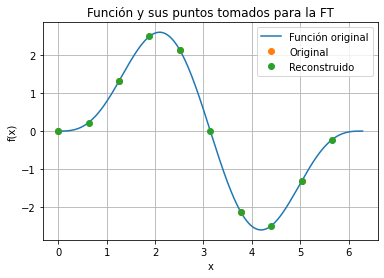

In [6]:
x=np.linspace(0,2*np.pi,1000)
f=2*np.sin(x)-np.sin(2*x)

plt.plot(x,f,label='Función original')
plt.plot(x1,a,'o',label='Original')
plt.plot(x2,b,'o',label='Reconstruido')
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Función y sus puntos tomados para la FT")
plt.legend()
plt.show()

No se pueden ver los puntos originales porque se dibujan primero y se superponen los reconstruidos. Entonces, para comparar los voy a dibujar solos para que se vean.

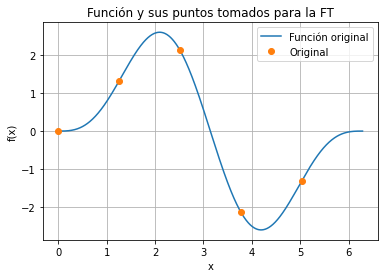

In [7]:
plt.plot(x,f,label='Función original')
plt.plot(x1,a,'o',label='Original')
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Función y sus puntos tomados para la FT")
plt.legend()
plt.show()

**7.2** We know that the exact Fourier series for a unit square wave in "sine phase" (see Fig. 6.1) is equal to $$y(x) = \frac{4}{\pi} (sin(x) + \frac{1}{3}sin(3x) + \frac{1}{5}sin(5x) + ...) = \frac{4}{\pi} \sum_{k=odd} \frac{sin(kx)}{k}$$

Calculate the amount of power in the first three terms of this infinite series. Using Parseval's theorem, calculate the total amount of power contained in all the other terms put together. What percentage of the total power is present in the first 3 terms?

Asumo que el ejercicio se refiere a los 3 primeros $b_k$ distintos de 0. Entonces, calculo los primeros $b_k$ distintos de 0:

In [8]:
b=np.zeros(3)
s=0
for i in range(6):
    if i%2==1:
        b[s]=(4/i/np.pi)
        s=s+1
b  

array([1.27323954, 0.42441318, 0.25464791])

Cantidad de potencia en estos 3 coeficientes:

In [9]:
s=0
for i in range(3):
    s=s+b[i]**2
p1=s/2
p1

0.9330555222529952

Para el cálculo de la potencia total, se debería calcular el valor de la serie con sus infinitos términos. Como no puedo tomar un número de términos infinito, tomaré uno lo suficientemente grande, de forma que los términos que no se sumen se pueden considerar despreciables.

In [10]:
# Potencia total (energía/tiempo)
r=np.zeros(10000)
for i in range(10000):
    if i%2==0:
        r[i]=0
    else:
        r[i]=(4/i/np.pi)
s=0
r[0]=r[0]/np.sqrt(2)
for i in range(10000):
    s=s+r[i]**2
    
ptot=s/2
ptot

0.9999594715266819

La potencia contenida en todos los términos excepto los 3 primeros es:

In [11]:
prest=ptot-p1
prest

0.0669039492736867

El porcentaje de la potencia total presente en los 3 primeros términos es:

In [12]:
porcentaje=p1/ptot
porcentaje

0.9330933391014923

Entonces, el porcentaje de la potencia total presente en los 3 primeros términos es del 93% aproximadamente.

**7.3** Explore the consequences of violating the preconditions of Shannon's sampling theorem in the following situation. Fix the number of samples at D=7 for the interval (0, 2π) and sample each of the following 9 functions:

sin x, sin 2x, sin 3x, sin 4x, sin 5x, sin 6x, sin 7x, sin 8x, sin 9x

to produce 9 different data vectors. Determine the vector of Fourier coefficients for each of these data vectors. Based on your results, describe how the "alias" frequency is related to the true frequency and to the Nyquist frequency.

In [13]:
D=7
b1=np.zeros(D)
b2=np.zeros(D)
b3=np.zeros(D)
b4=np.zeros(D)
b5=np.zeros(D)
b6=np.zeros(D)
b7=np.zeros(D)
b8=np.zeros(D)
b9=np.zeros(D)
for i in range(D):
    b1[i]=np.sin(i*2*np.pi/D)
    b2[i]=np.sin(i*2*np.pi/D*2)
    b3[i]=np.sin(i*2*np.pi/D*3)
    b4[i]=np.sin(i*2*np.pi/D*4)
    b5[i]=np.sin(i*2*np.pi/D*5)
    b6[i]=np.sin(i*2*np.pi/D*6)
    b7[i]=np.sin(i*2*np.pi/D*7)
    b8[i]=np.sin(i*2*np.pi/D*8)
    b9[i]=np.sin(i*2*np.pi/D*9)

In [14]:
f1=ft(b1,1)
f2=ft(b2,1)
f3=ft(b3,1)
f4=ft(b4,1)
f5=ft(b5,1)
f6=ft(b6,1)
f7=ft(b7,1)
f8=ft(b8,1)
f9=ft(b9,1)

Como la función es $\sin(kx)$, el vector de Fourier debería de ser 0 para todos los términos, excepto para $b_k$, para el cuál tenrdría que ser 1.

In [15]:
np.round(f1,7)

array([ 0.,  0.,  1.,  0., -0., -0.,  0.])

In [16]:
np.round(f2,7)

array([ 0.,  0., -0.,  0.,  1.,  0., -0.])

In [17]:
np.round(f3,7)

array([ 0.,  0., -0.,  0., -0.,  0.,  1.])

In [18]:
np.round(f4,7)

array([ 0.,  0., -0.,  0., -0., -0., -1.])

In [19]:
np.round(f5,7)

array([ 0.,  0., -0., -0., -1.,  0.,  0.])

In [20]:
np.round(f6,7)

array([ 0., -0., -1.,  0.,  0.,  0., -0.])

In [21]:
np.round(f7,7)

array([-0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [22]:
np.round(f8,7)

array([ 0., -0.,  1.,  0.,  0., -0.,  0.])

In [23]:
np.round(f9,7)

array([ 0.,  0., -0., -0.,  1.,  0., -0.])

Como se puede observar, el resultado es correcto hasta $\sin(3x)$, ya que con D=7 solamente podemos llegar a $b_3$, para el resto de funciones seno, los coeficientes que encontramos son debidos al aliasing.

Conociendo el valor de la frecuencia de Nyquist, teniendo en cuenta que el intervalo del muestreo es $2\pi/7$, se puede predecir este resultado.

In [24]:
delta=2*np.pi/7
f_Nyquist=1/(2*delta)
for i in range(1,10):
    if i/(2*np.pi)<f_Nyquist:    #la frecuencia es omega/2*pi ; si f es menor que la frecuencia de Nyquist no hay aliasing
        print('k=',i,'no aliasing')
    else:
        print('k=',i,'aliasing')

k= 1 no aliasing
k= 2 no aliasing
k= 3 no aliasing
k= 4 aliasing
k= 5 aliasing
k= 6 aliasing
k= 7 aliasing
k= 8 aliasing
k= 9 aliasing


Para mostrar el efecto del aliasing, se va a representar la función original y la reconstruida por fourier a partir $k=4$. También se representará el último caso sin aliasing, $k=3$.

In [26]:
xm=np.zeros(7)     # Para graficar los puntos
for i in range(7):
    xm[i]=i*2*np.pi/7

sin(3x)

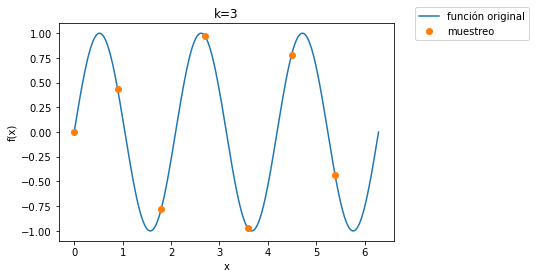

In [28]:
x=np.linspace(0,2*np.pi,1000)
f1=np.sin(3*x)

plt.plot(x,f1,label='función original')
plt.plot(xm,b3,'o',label='muestreo')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("k=3")
plt.legend(bbox_to_anchor=(1.05, 1.0,0.2, 0.1), loc='upper left')
plt.show()

sin(4x)

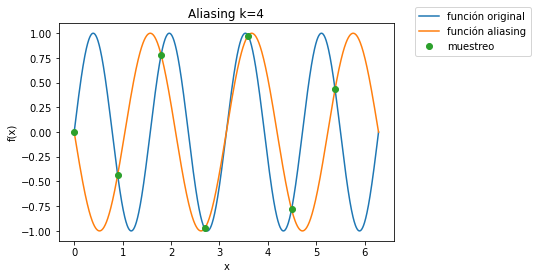

In [30]:
x=np.linspace(0,2*np.pi,1000)
f1=np.sin(4*x)
f2=-np.sin(3*x) #b_3=-1

plt.plot(x,f1,label='función original')
plt.plot(x,f2,label='función aliasing')
plt.plot(xm,b4,'o',label='muestreo')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Aliasing k=4")
plt.legend(bbox_to_anchor=(1.05, 1.0,0.2, 0.1), loc='upper left')
plt.show()

sin(5x)

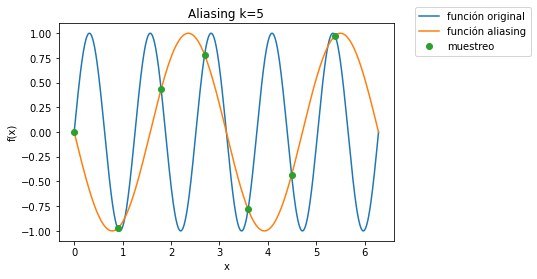

In [31]:
x=np.linspace(0,2*np.pi,1000)
f1=np.sin(5*x)
f2=-np.sin(2*x) #b_2=-1

plt.plot(x,f1,label='función original')
plt.plot(x,f2,label='función aliasing')
plt.plot(xm,b5,'o',label='muestreo')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Aliasing k=5")
plt.legend(bbox_to_anchor=(1.05, 1.0,0.2, 0.1), loc='upper left')
plt.show()

sin(6x)

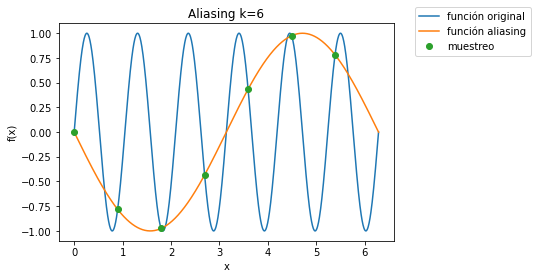

In [32]:
x=np.linspace(0,2*np.pi,1000)
f1=np.sin(6*x)
f2=-np.sin(1*x) #b_1=-1

plt.plot(x,f1,label='función original')
plt.plot(x,f2,label='función aliasing')
plt.plot(xm,b6,'o',label='muestreo')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Aliasing k=6")
plt.legend(bbox_to_anchor=(1.05, 1.0,0.2, 0.1), loc='upper left')
plt.show()

sin(7x)

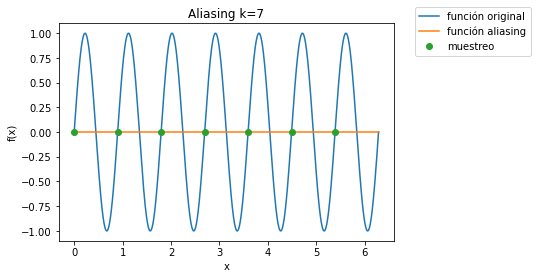

In [33]:
x=np.linspace(0,2*np.pi,1000)
f1=np.sin(7*x)
f2=np.sin(0*x) #b_1=-1

plt.plot(x,f1,label='función original')
plt.plot(x,f2,label='función aliasing')
plt.plot(xm,b7,'o',label='muestreo')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Aliasing k=7")
plt.legend(bbox_to_anchor=(1.05, 1.0,0.2, 0.1), loc='upper left')
plt.show()

sin(8x)

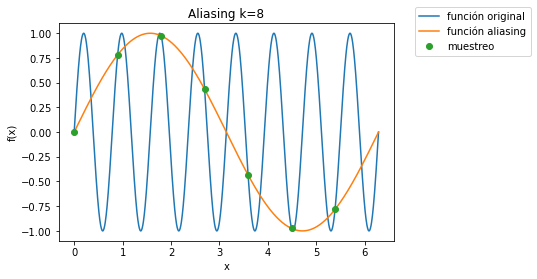

In [34]:
x=np.linspace(0,2*np.pi,1000)
f1=np.sin(8*x)
f2=np.sin(1*x) #b_1=1

plt.plot(x,f1,label='función original')
plt.plot(x,f2,label='función aliasing')
plt.plot(xm,b8,'o',label='muestreo')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Aliasing k=8")
plt.legend(bbox_to_anchor=(1.05, 1.0,0.2, 0.1), loc='upper left')
plt.show()

sin(9x)

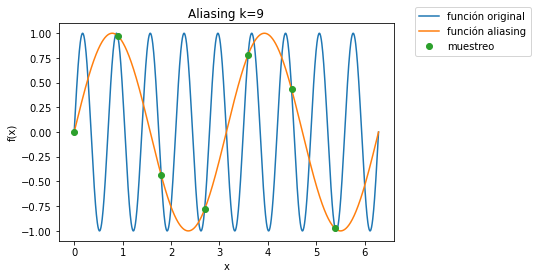

In [35]:
x=np.linspace(0,2*np.pi,1000)
f1=np.sin(9*x)
f2=np.sin(2*x) #b_2=1

plt.plot(x,f1,label='función original')
plt.plot(x,f2,label='función aliasing')
plt.plot(xm,b9,'o',label='muestreo')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Aliasing k=9")
plt.legend(bbox_to_anchor=(1.05, 1.0,0.2, 0.1), loc='upper left')
plt.show()